# 데이터의 분포 시각화

데이터의 분포를 시각화 하는 방법

| 구분 | 시각화 방법 |
|---|---|
| 연속형 | BoxPlot, Histogram |
| 범주형 | BarPlot(빈도 그래프), PiePlot |

## #01. 준비작업

### [1] 패키지 참조

In [1]:
import sys
import numpy as np
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

### [2] 데이터 가져오기

어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터

In [3]:
origin = read_excel("https://data.hossam.kr/pydata/poll.xlsx")
origin

,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70
5,남자,기혼,21,대학원,80
6,여자,미혼,39,대학교,190
7,남자,기혼,32,대학교,100
8,남자,미혼,44,초등학교,120
9,남자,미혼,55,대학교,110


### [3] 그래프 초기화

In [4]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.unicode_minus"] = False

## #02. BoxPlot (상자그림)

하나의 연속형 변수에 대해서 분포 형태, 퍼짐정도, 이상치 여부 등을 시각화하고, 하나의 그룹 혹은 여러개의 그룹 간 비교하는데 유용한 그래프

명목형 변수에 대해서는 그릴 수 없다.

![boxplot](res/boxplot.png)

### [1] 특정 컬럼에 대한 상자그림

#### (1) 기본 구성

$x$축의 좌표값은 `1`임을 확인할 수 있다.

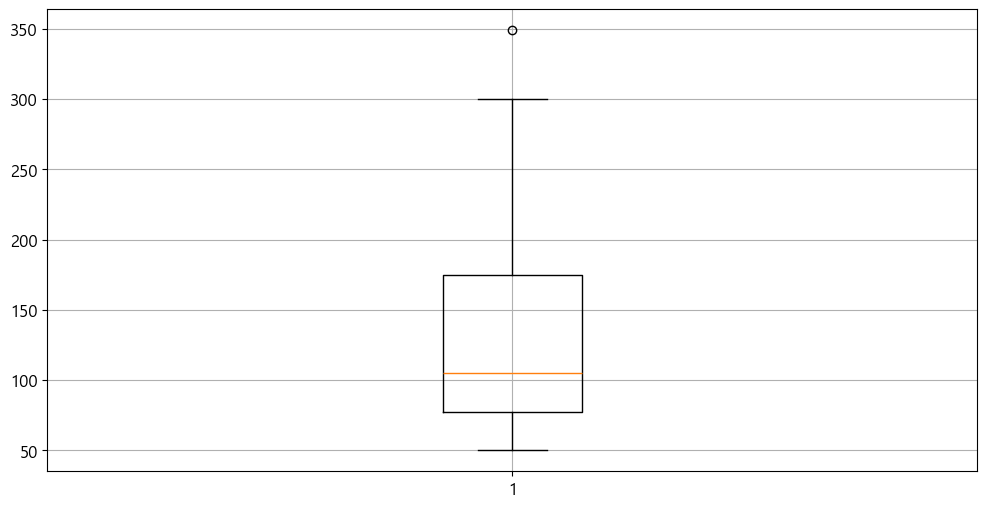

In [4]:
plt.figure()
plt.boxplot(origin['월수입'])
plt.grid()
plt.show()
plt.close()

#### (2) 그래프 옵션 설정

##### `boxplot()`메서드의 `sym` 파라미터

두 글자의 조합으로 구성되는 값을 설정한다. 첫 번째 글자는 이상치에 포인터의 색상이고 두 번째 글자는 이상치 포인터의 모양이다. (글자 순서 변경 가능)

| 구분 | 값 |
|--|--|
| 색상 | `r`(빨강), `b`(파랑), `y`(노랑), `g`(초록), `h`(화이트,기본값) |
| 모양 | `s`(사각형), `*`(별), `^`(삼각형), `o`(원,기본값) |

##### $x$축에 변수 이름 지정하기

$x$축 좌표가 1부터 시작된다는 점에 유의하려 `xticks()` 메서드를 사용한다.

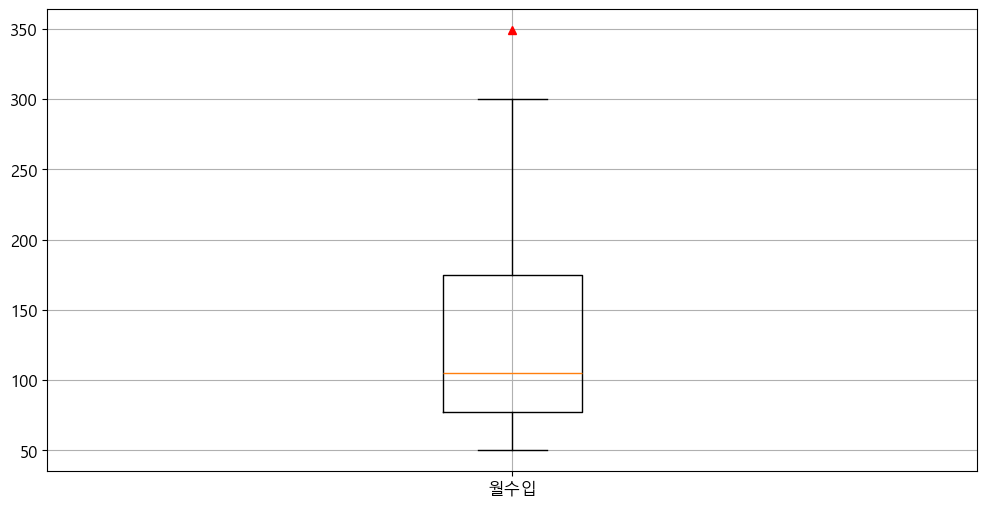

In [5]:
plt.figure()
plt.boxplot(origin['월수입'], sym="r^")
plt.xticks([1], ['월수입'])
plt.grid()
plt.show()
plt.close()

#### (3) 가로 상자그림

`boxplot()`메서드에 `vert` 파라미터에 `0`을 설정한다. (기본값=`1`)

가로로 표시할 경우 $x$축이 아닌 $y$축에 변수의 이름을 표시해야 한다.

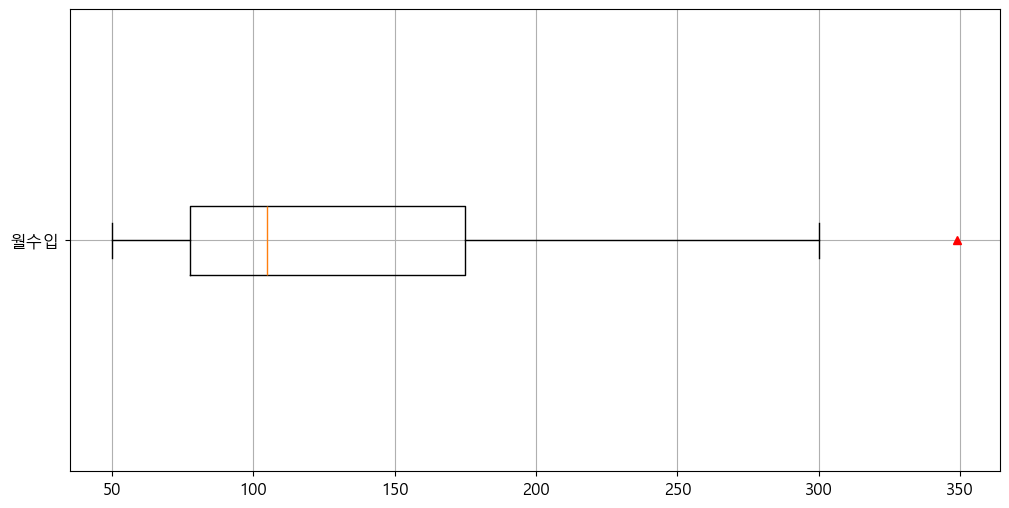

In [6]:
plt.figure()
plt.boxplot(origin['월수입'], sym="r^", vert=0)
plt.yticks([1], ['월수입'])
plt.grid()
plt.show()
plt.close()

### [2] 두 개 이상의 변수에 대한 상자그림

상자그림에 표시할 변수를 리스트로 묶어서 설정한다.

이 경우 변수간의 값의 범위 차이가 클 경우 범위가 작은 변수는 그래프를 통한 확인이 다소 어렵다.

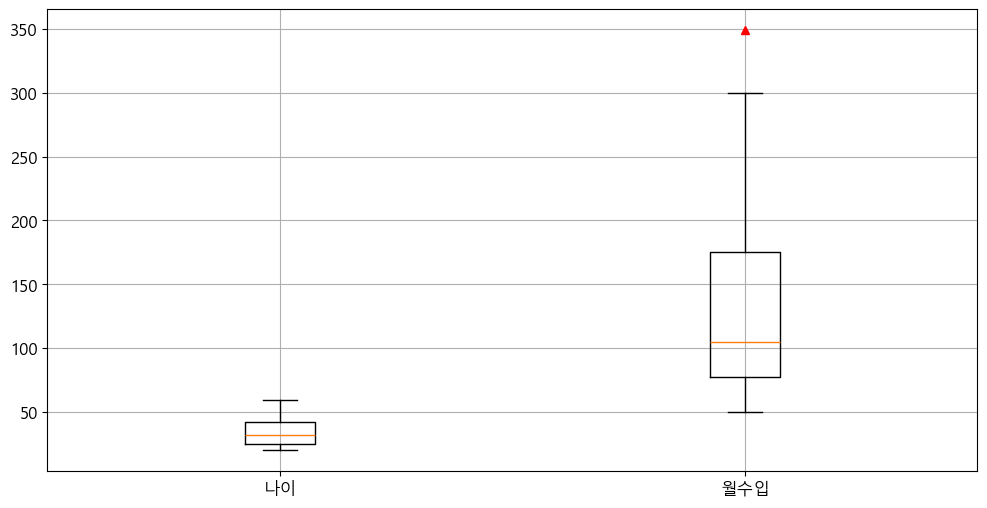

In [7]:
plt.figure()
plt.boxplot([origin['나이'], origin['월수입']], sym="r^")
plt.xticks([1, 2], ['나이', '월수입'])
plt.grid()
plt.show()
plt.close()

## #03. Histogram

도수분포표를 시각화 한 그래프

### [1] 나이에 대한 도수 분포 확인하기

#### (1) 도수 분포표 생성

##### 도수 분포 확인

In [8]:
hist, bins = np.histogram(origin['나이'], bins=5)
print(hist)
print(bins)

[15 11  4  5  5]
[20.  27.8 35.6 43.4 51.2 59. ]


##### 도수 분포표 구성

In [9]:
info = []
for i, v in enumerate(hist):
    if i+1 < len(hist):
        tpl = "%d이상 %d미만"
    else:
        tpl = "%d이상 %d이하"

    cls = tpl % (bins[i], bins[i+1])
    line = {"계급": cls, "도수": v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급', inplace=True)
hist_df

,도수
계급,
20이상 27미만,15
27이상 35미만,11
35이상 43미만,4
43이상 51미만,5
51이상 59이하,5


#### (2) 히스토그램 생성

##### 기본 구성 방법

데이터 원본을 사용해서 시각화한다.

x축을 pyplot이 임의로 지정하기 때문에 데이터 구간을 파악하기 어렵다.

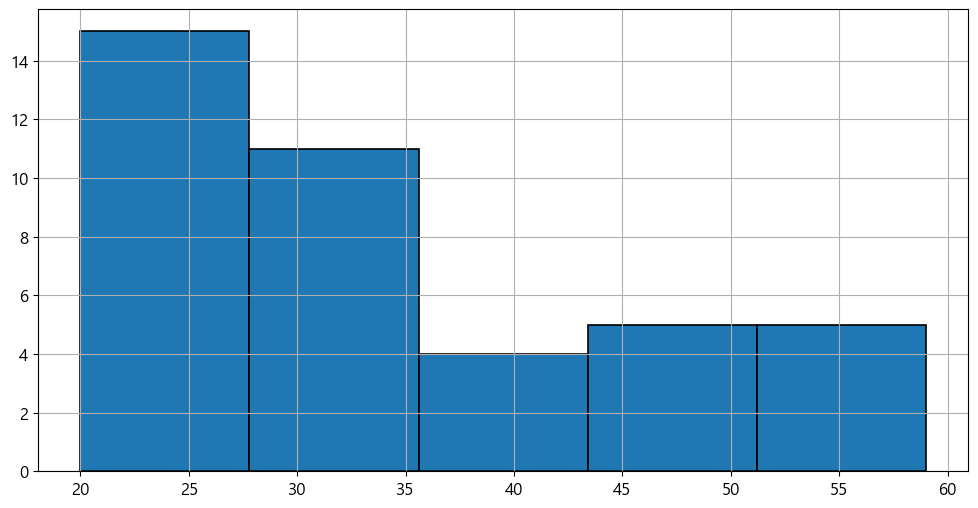

In [10]:
plt.figure()
plt.hist(origin['나이'], bins=5, edgecolor='black', linewidth=1.2)
plt.grid()
plt.show()
plt.close()

##### $x$축 설정하기

`np.histogram()` 메서드를 사용하여 데이터 구간 정보를 리턴받은 후 그래프의 `xticks()`로 적용한다.

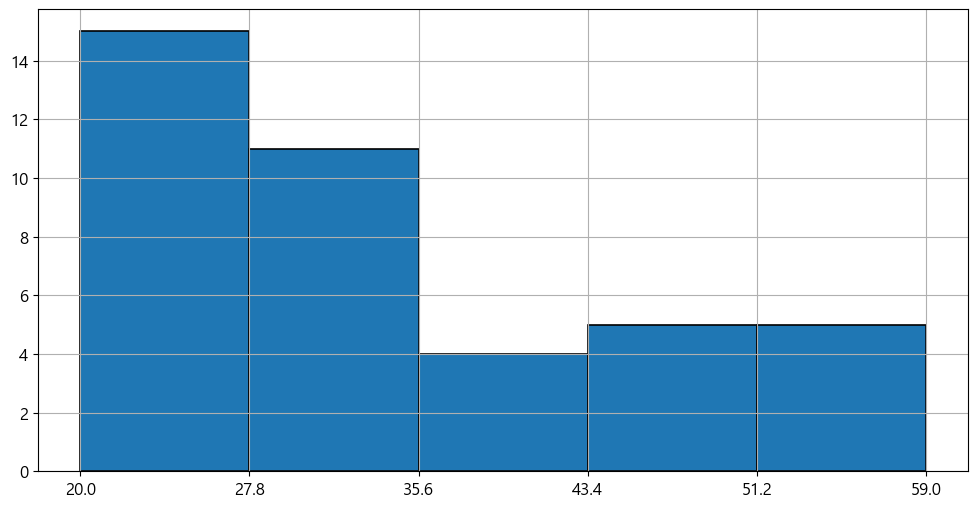

In [11]:
hist, bins = np.histogram(origin['나이'], bins=5)

plt.figure()
plt.hist(origin['나이'], bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins)
plt.grid()
plt.show()
plt.close()

### [2] 도수 구간을 직접 설정하기

`bins` 파라미터에 도수 구간을 정의한 리스트를 설정한다.

In [12]:
mybins = [20,30,40,50,60]
hist, bins = np.histogram(origin['나이'], bins=mybins)
print(hist)
print(bins)

[17 10  8  5]
[20 30 40 50 60]


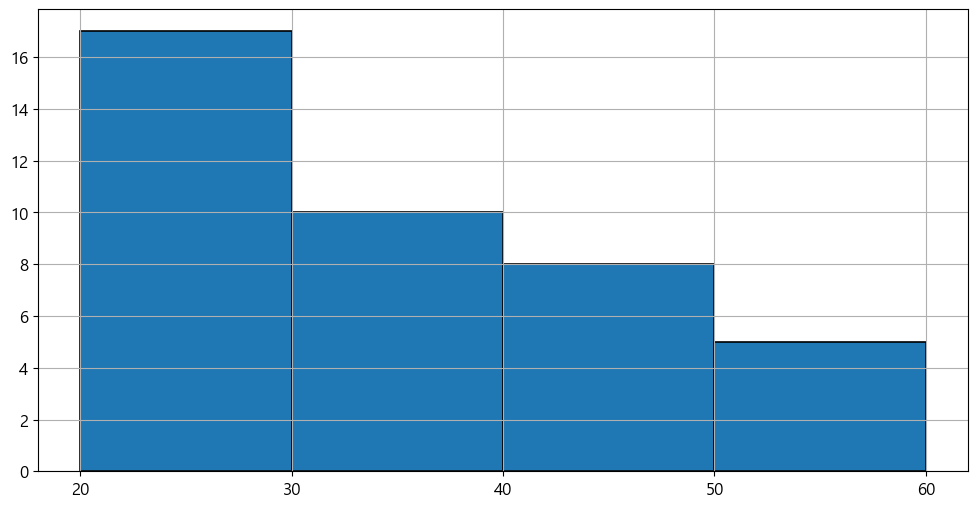

In [13]:
plt.figure()
plt.hist(origin['나이'], bins=mybins, edgecolor='black', linewidth=1.2)
plt.xticks(mybins, mybins)
plt.grid()
plt.show()
plt.close()

### [3] 히스토그램의 계급의 수와 간격의 크기

우리에게 주어지는 데이터는 종류도 다양하며 관측치의 개수도 다양하다. 

또한 그 데이터의 최솟값과 최댓값 또한 다양하다. 따라서 데이터가 주어졌을 때 계급의 개수와 계급의 간격을 설정하는 것에 어려움이 있을 수 있다. 

#### (1) 계급의 수를 구하는 방법

##### 스터지스의 공식(Sturges' formula)

히스토그램의 계급의 수를 결정하는 공식

$계급구간수 = 1 + 3.3\log_n$

> $n$ = 관측치의 수

##### 관측치의 수에 따른 계급구간 수 표 활용

통계학에서 일반적으로 활용하는 표

| 관측치의 수 | 계급구간의 수 |
|---|---|
| 50 미만 | 5 ~ 7 |
| 50 ~ 200 | 7 ~ 9 |
| 200 ~ 500 | 9 ~ 10 |
| 500 ~ 1,000 | 10 ~ 11 |
| 1,000 ~ 5,000 | 11 ~ 13 |
| 5,000 ~ 50,000 | 13 ~ 17 |
| 50,000 초과 | 17 ~ 20 |

#### (2) 간격의 크기를 구하는 방법

$계급구간의 간격 = 관측치 최대값 - 관측치 최소값 / 계급구간의 수$

 여기서 중요한 지점은 계급구간의 첫 시작지점을 어떻게 잡아야 하는지이다.
 
 이 때 필수적으로 알아야 하는 점은 첫 계급구간은 반드시 최소 관측치를 포함해야 한다는 점이다.

### [4] 히스토그램의 모습

#### (1) 대칭성

정중앙 부분에 선을 수직으로 긋고 절반으로 접었을 때 일치하는 그래프

특히 정삼각형에 가까운 형태를 **종모양**이라고 하는데 이 그래프는 정규분포와 밀접한 관련이 있기 때문에 굉장히 중요한 히스토그램의 모습이라고 할 수 있다.

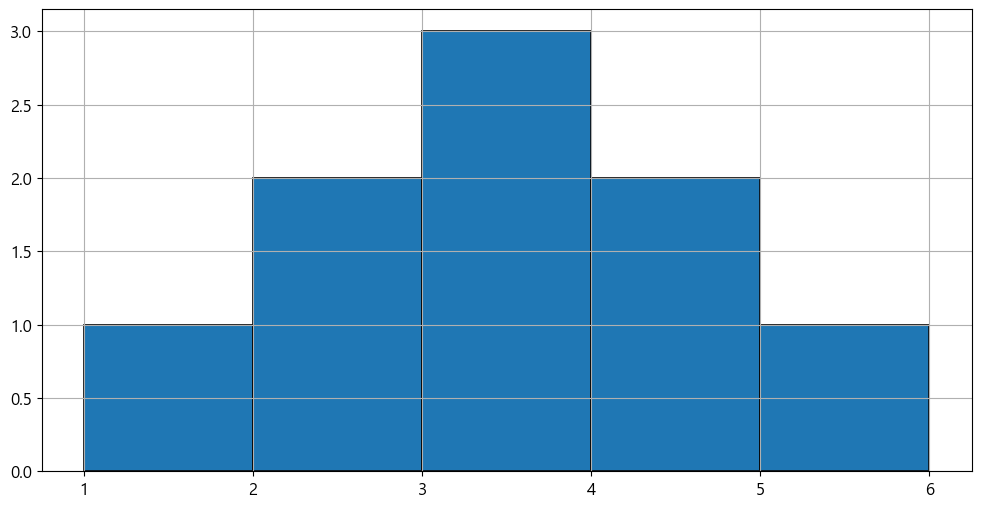

In [14]:
mybins = [1,2,3,4,5,6]
data = [1,2,2,3,3,3,4,4,5]

plt.figure()
plt.hist(data, bins=mybins, edgecolor='black', linewidth=1.2)
plt.xticks(mybins, mybins)
plt.grid()
plt.show()
plt.close()

#### (2) 비대칭성

그래프의 모양을 보면 점점 작아지는 히스토그램의 모양을 볼 수 있는데, 점점 작아지는 방향을 꼬리라고 칭하며 꼬리가 양의 방향으로 향해 있다면 양의 비대칭이며 꼬리가 음의 방향을 향해 있다면 음의 비대칭이라고 할 수 있다. 밑의 그림은 양과 음의 비대칭 히스토그램의 모습이다.

양의 비대칭은 평균이 중앙값보다 작으며 음의 비대칭은 평균이 중앙값보다 크다.

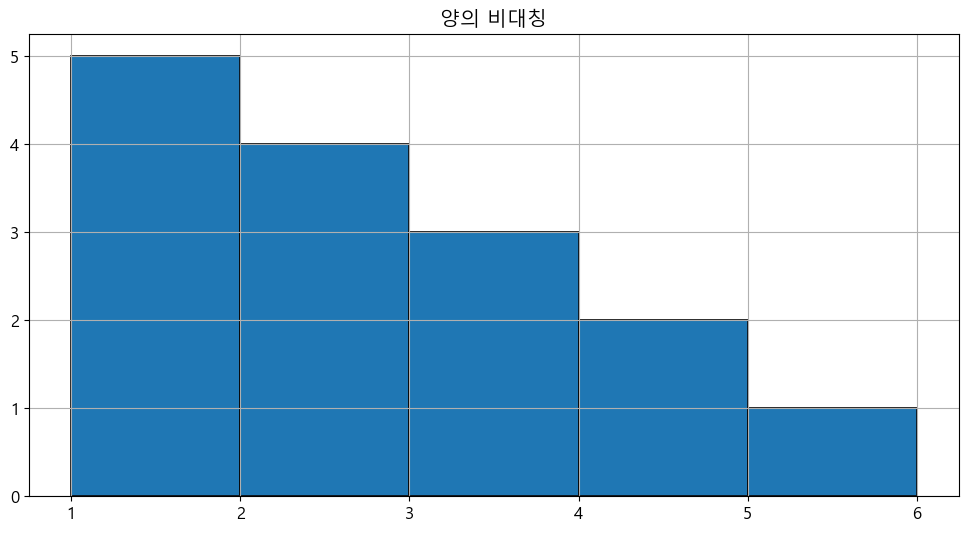

In [15]:
mybins = [1,2,3,4,5,6]
data = [1,1,1,1,1,2,2,2,2,3,3,3,4,4,5]

plt.figure()
plt.hist(data, bins=mybins, edgecolor='black', linewidth=1.2)
plt.xticks(mybins, mybins)
plt.title("양의 비대칭")
plt.grid()
plt.show()
plt.close()

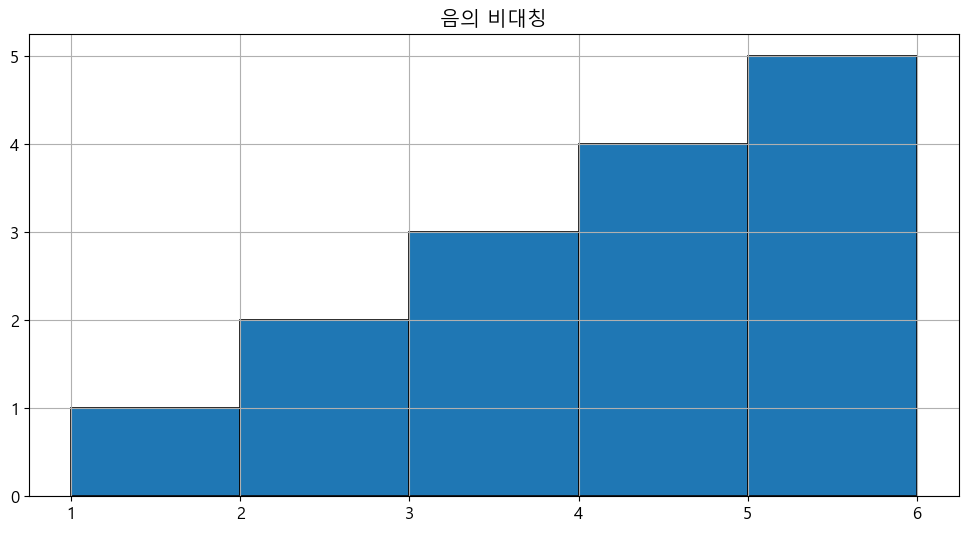

In [16]:
mybins = [1,2,3,4,5,6]
data = [1,2,2,3,3,3,4,4,4,4,5,5,5,5,5]

plt.figure()
plt.hist(data, bins=mybins, edgecolor='black', linewidth=1.2)
plt.xticks(mybins, mybins)
plt.title("음의 비대칭")
plt.grid()
plt.show()
plt.close()

### [5] 봉우리 계급구간의수

 히스토그램에서 가장 높은 도수를 나타내고 있는 수치를 최빈값(mode) 이라고 부른다. 
 
 최빈계급이란 최대의 관측치 수를 가진 계급이다. 
 
 만일 최빈계급이 하나일 경우에는 단봉을 가진 히스토그램 이라고 불리며 최빈계급이 두 개일 경우에는 양봉을 가진 히스토그램이라고 불린다. 

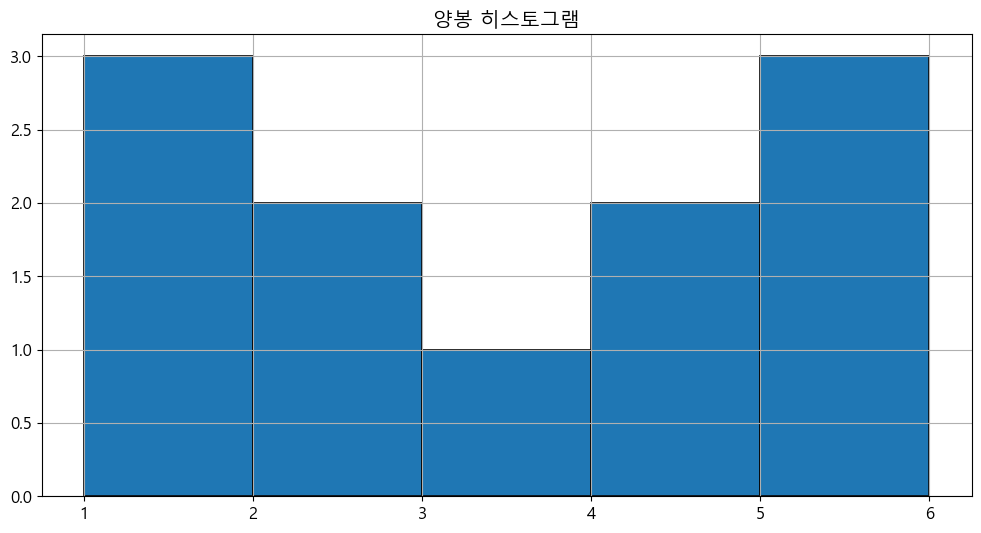

In [17]:
mybins = [1,2,3,4,5,6]
data = [1,1,1,2,2,3,4,4,5,5,5]

plt.figure()
plt.hist(data, bins=mybins, edgecolor='black', linewidth=1.2)
plt.xticks(mybins, mybins)
plt.title("양봉 히스토그램")
plt.grid()
plt.show()
plt.close()